# Climate Change and Impacts Analysis in African Countries Using IEA-EDGAR CO2 Dataset

## Dataset

*The dataset, IEA-EDGAR CO2, is a component of the EDGAR (Emissions Database for Global Atmospheric Research) Community GHG database version 7.0 (2022) including or based on data from IEA (2021) Greenhouse Gas Emissions from Energy, www.iea.org/statistics, as modified by the Joint Research Centre. The data source was the [EDGARv7.0_GHG website](https://edgar.jrc.ec.europa.eu/dataset_ghg70) provided by Crippa *et. al.* (2022) and with [DOI](https://data.europa.eu/doi/10.2904/JRC_DATASET_EDGAR).*

The dataset contains three sheets - `IPCC 2006`, `1PCC 1996`, and `TOTALS BY COUNTRY` on the amount of CO2 (a greenhouse gas) generated by countries between 1970 and 2021. **You can download the dataset from your workspace or inspect the dataset directly [here](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117)**.

### TOTALS BY COUNTRY SHEET

This sheet contains the annual CO2 (kt) produced between 1970 - 2021 in each country. The relevant columns in this sheet are:

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |


### IPCC 2006

These sheets contain the amount of CO2 by country and the industry responsible. 

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |
| `ipcc_code_2006_for_standard_report_name` | The industry responsible for generating CO2 |

## Instructions

The head of analytics in your organization has specifically asked you to do the following:


1. Clean and tidy the datasets. 
2. Create a line plot to show the trend of `CO2` levels across the African regions.
3. Determine the relationship between time (`Year`) and `CO2` levels across the African regions.
4. Determine if there is a significant difference in the `CO2` levels among the African Regions.
5. Determine the most common (top 5) industries in each African region.
6. Determine the industry responsible for the most amount of CO2 (on average) in each African Region.
7. Predict the `CO2` levels (at each African region) in the year 2025.
8. Determine if `CO2` levels affect annual `temperature` in the selected African countries.

In [164]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS


In [165]:
#Loading dataset
df=pd.read_excel('IEA_EDGAR_CO2_1970-2021.xlsx', sheet_name=['IPCC 2006', 'TOTALS BY COUNTRY'], skiprows=10)


In [166]:
# Subsetting the needed dataframe
african_reg=['Eastern_Africa', 'Western_Africa', 'Northern_Africa', 'Southern_Africa']
# QUery the dataset to obtain the dataframe based on the selected regions
ip_afr=df['IPCC 2006'].query('C_group_IM24_sh in @african_reg')
tot_by_cty=df['TOTALS BY COUNTRY'].query('C_group_IM24_sh in @african_reg')

In [167]:
# Droping and renaming columns
ip_afr=ip_afr.drop(['IPCC_annex', 'ipcc_code_2006_for_standard_report', 'Substance'], axis=1)
ip_afr=ip_afr.rename(columns={'C_group_IM24_sh':'Regions', 'ipcc_code_2006_for_standard_report_name':'Industry', 'Country_code_A3':'Code'})


In [168]:
tot_by_cty=tot_by_cty.drop(['IPCC_annex', 'Substance'], axis=1)
tot_by_cty=tot_by_cty.rename(columns={'Country_code_A3':'Code', 'C_group_IM24_sh':'Regions'})


In [169]:
#e=list(filter(lambda f:f.startswith('Y_'), ip_afr.columns))
#d=list(set(ip_afr.columns).difference(e))

#nd=ip_afr.melt(id_vars=d, value_vars=e, var_name='Years', value_name='CO2')
#nd['Years']=(nd['Years'].str.replace('Y_', '')).astype(int)
#nd=nd.dropna()
#(nd.info())

In [170]:
# Melting the two datasets

def melt_df(df1):
    # Filter out the CO2 data
    value_var=list(filter(lambda f:f.startswith('Y_'), df1.columns))
    id_var=list(set(df1.columns).difference(value_var))
    
    newdf=df1.melt(value_vars=value_var, id_vars=id_var, var_name='Year', value_name='CO2')
    # Remove the empty value rows
    newdf=newdf.dropna()
    # remove 'Y_'
    newdf['Year']=(newdf['Year'].str.replace('Y_', '')).astype(int)
    
    return newdf

ip_afr=melt_df(ip_afr)
tot_by_cty=melt_df(tot_by_cty)               
                   

In [171]:
ip_afr.head()

,Code,fossil_bio,Industry,Regions,Name,Year,CO2
0,AGO,bio,Manufacturing Industries and Construction,Southern_Africa,Angola,1970,468.101210
1,AGO,bio,Residential and other sectors,Southern_Africa,Angola,1970,9803.605447
3,AGO,bio,Emissions from biomass burning,Southern_Africa,Angola,1970,1168.997514
4,AGO,fossil,Main Activity Electricity and Heat Production,Southern_Africa,Angola,1970,137.584287
5,AGO,fossil,Petroleum Refining - Manufacture of Solid Fuel...,Southern_Africa,Angola,1970,74.805080


In [172]:
tot_by_cty.head()

,Code,Name,Regions,Year,CO2
0,AGO,Angola,Southern_Africa,1970,20393.274068
1,BDI,Burundi,Eastern_Africa,1970,4385.562636
2,BEN,Benin,Western_Africa,1970,4318.786819
3,BFA,Burkina Faso,Western_Africa,1970,8158.106987
4,BWA,Botswana,Southern_Africa,1970,947.246888


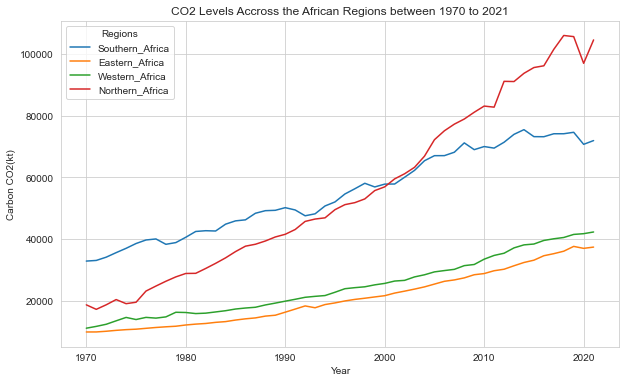

In [225]:
# Task 2: Create a line plot to show the trend of CO2 levels across the African regions
plt.figure(figsize=[10,6])
sns.set_style('whitegrid')
sns.lineplot(data=tot_by_cty, x='Year', y='CO2', hue='Regions', ci=None).set(title='CO2 Levels Accross the African Regions between 1970 to 2021')
#plt.title('CO2 Levels Accross the African Regions between 1970 to 2021')
plt.ylabel('Carbon CO2(kt)')
plt.savefig('CO2_TREND_AFRICA')

In [ ]:
#Task 2: Determine the relationship between time (Year) and CO2 levels across the African regions
sns.jointplot(data=tot_by_cty,x='Years', y='CO2', hue='Regions')

In [ ]:
#Task 3 Grouping by industry and region, and conducting correlation with pearson
grouping=tot_by_cty.groupby('Regions').corr(method='pearson')
grouping

In [ ]:
# Task 4:Determine if there is a significant difference in the CO2 levels among the African Regions.
# Using ANOVA Bonfi
import pingouin
anova_dff=pingouin.anova(data=tot_by_cty, between='Name', dv='CO2')
anova_dff

In [ ]:
anova_dff2=pingouin.anova(data=tot_by_cty, between='Regions', dv='CO2')
anova_dff2

In [ ]:
# USing pairwise test
pw=pingouin.pairwise_tests(data=tot_by_cty, between='Regions', dv='CO2', padjust='bonf')
pw

In [ ]:
# TAsk 5: Determine the most common (top 5) industries in each African region
grp_ip=ip_afr.groupby(['Regions', 'Industry']).size().reset_index(name='Count')
top_5=grp_ip.sort_values('Count', ascending=False)
top_5.head(5)

In [ ]:
# Task 6: Determine the industry responsible for the most amount of CO2 (on average) in each African Region.
Ind_gr=ip_afr.groupby(['Regions','Industry'])['CO2'].mean().reset_index()
Ind_gr


In [ ]:
Ind_most=Ind_gr.loc[Ind_gr.groupby('Regions')['CO2'].idxmax()].reset_index(drop=True)
Ind_most.sort_values('CO2', ascending=False)

In [ ]:
tot_by_cty.head()

In [ ]:
# Task7 Predict the CO2 levels (at each African region) in the year 2025. Using African
# Creating new dataframe
dt=pd.DataFrame({'Years':2025, 'Regions': african_reg})
dt=pd.get_dummies(dt)
# Creating features and target variable, with co2 in log
fet=pd.get_dummies(tot_by_cty[['Years', 'Regions']])
tgt=np.log10(tot_by_cty['CO2'])

In [ ]:
# Instantiate the model
lg=LinearRegression()
lg.fit(fet, tgt)

In [ ]:
pred=lg.predict(dt)
pred=(10**(pred)).round(2)
pred

In [ ]:
# Task 8: Determine if CO2 levels affect annual temperature in the selected African countries.
temp=pd.read_csv('temperatures.csv')
temp.head()

Select Name, Year and CO2 of countries countries. 
Save the result as selected_countries.
Convert temperatures dataset from wide to long format. 
Set the new column names to Name and Temperature. 
Save the result as temp_long.
Perform an inner join between selected_countries and temp_long on Name and Year. 
Save the result as joined.
Create a linear model of Temperature by CO2 and Name. 
Save the result as model_temp. The code has been added for you.
A one unit rise in log10 CO2 leads to how many degrees rise in temperature? Run model_temp.summary() to find out!
What is the adjusted R squared value of the model?

In [ ]:
sb=selected_cty.groupby('Name')['CO2'].sum().round(2).reset_index()
sb

In [175]:
# 
countries = ["Ethiopia", "Mozambique", "Nigeria", "Tunisia"]
selected_cty=tot_by_cty[tot_by_cty['Name'].isin(countries)][['Name','Year','CO2']]
selected_cty

,Name,Year,CO2
17,Ethiopia,1970,43392.140923
31,Mozambique,1970,24200.035990
37,Nigeria,1970,161347.912692
50,Tunisia,1970,5725.783312
73,Ethiopia,1971,43458.192502
...,...,...,...
2850,Tunisia,2020,31486.838616
2873,Ethiopia,2021,201641.675813
2887,Mozambique,2021,36771.841809
2893,Nigeria,2021,611144.166997


In [176]:
sb.loc[sb['CO2'].idxmax()].reset_index(drop=True)

0        Nigeria
1    19233719.37
Name: 2, dtype: object

In [177]:
temp_melt=temp.melt(id_vars='Year', var_name='Name', value_vars=countries, value_name='Temperature' )
temp_melt.head()

,Year,Name,Temperature
0,1960,Ethiopia,22.59
1,1961,Ethiopia,22.30
2,1962,Ethiopia,22.36
3,1963,Ethiopia,22.56
4,1964,Ethiopia,22.15


Nigeria had the highest CO2 emission level

In [161]:
selected_cty['Years'].rename({'Years':'Year'})

17      1970
31      1970
37      1970
50      1970
73      1971
        ... 
2850    2020
2873    2021
2887    2021
2893    2021
2906    2021
Name: Years, Length: 208, dtype: int32

In [217]:
# Joining temp and selected country together
joined=pd.merge(selected_cty, temp_melt, how='inner', on=['Name', 'Year'])
joined

,Name,Year,CO2,Temperature
0,Ethiopia,1970,43392.140923,22.81
1,Mozambique,1970,24200.035990,24.10
2,Nigeria,1970,161347.912692,26.91
3,Tunisia,1970,5725.783312,19.42
4,Ethiopia,1971,43458.192502,22.30
...,...,...,...,...
203,Tunisia,2020,31486.838616,20.87
204,Ethiopia,2021,201641.675813,23.35
205,Mozambique,2021,36771.841809,24.53
206,Nigeria,2021,611144.166997,27.67


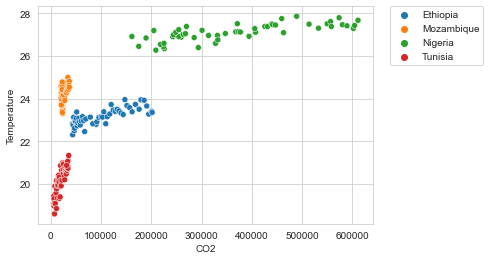

In [224]:
sns.scatterplot(x='CO2', y='Temperature',hue='Name', data=joined)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [187]:
# Linear model of temperature by CO2:
model_temp=OLS.from_formula('Temperature~np.log10(CO2)+Name', data=joined).fit()
model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3241.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          1.22e-182
Time:                        17:44:19   Log-Likelihood:                -54.347
No. Observations:                 208   AIC:                             118.7
Df Residuals:                     203   BIC:                             135.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.4981      0.583     23.138      0.000      12.348      14.648
Name[T.Mozambique]     2.0759      0.090     23.021      0.000       1.898       2.254
Name[T.Nigeria]        2.8345      0.092     30.884      0.000       2.654       3.016
Name[T.Tunisia]       -1.6254      0.104    -15.673      0.000      -1.830      -1.421
np.log10(CO2)          1.9472      0.117     16.620      0.000       1.716       2.178
==============================================================================
Omnibus:                        3.230   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.985
Skew:                          -0.291   Prob(JB):                        0.225
Kurtosis:                       3.073   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
model_temp.params.reset_index(name='coef')

,index,coef
0,Intercept,13.498081
1,Name[T.Mozambique],2.075880
2,Name[T.Nigeria],2.834549
3,Name[T.Tunisia],-1.625396
4,np.log10(CO2),1.947243


In [191]:
from statsmodels.formula.api import ols

In [212]:
model_temp2=ols('Temperature~np.log(CO2)', data=joined).fit()
model_temp2.params

Intercept      5.290892
np.log(CO2)    1.663790
dtype: float64

In [213]:
model_temp2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     410.6
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           6.13e-51
Time:                        17:52:37   Log-Likelihood:                -374.24
No. Observations:                 208   AIC:                             752.5
Df Residuals:                     206   BIC:                             759.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.2909      0.912      5.803      0.000       3.493       7.089
np.log(CO2)     1.6638      0.082     20.264      0.000       1.502       1.826
==============================================================================
Omnibus:                      198.335   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.050
Skew:                           0.189   Prob(JB):                     0.000327
Kurtosis:                       1.692   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""